# 케라스 CNN Fashion MNIST

In [ ]:
%load_ext tensorboard

In [ ]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Input

### 데이터 로드 및 전처리

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

x_train = x_train / 255.
x_test = x_test / 255.

print(x_train.shape)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandle', 'Shirt', 'Sneaker', 'Bag', 'ankle boot']

### 모델 구성 및 컴파일
- 임의의 모델

In [ ]:
def build_model():
  model = Sequential()

  input = Input(shape=(28, 28, 1))
  output = Conv2D(filters=32, kernel_size=(3, 3))(input)
  output = Conv2D(filters=64, kernel_size=(3, 3))(output)
  output = Conv2D(filters=64, kernel_size=(3, 3))(output)
  output = Flatten()(output)
  output = Dense(units=128, activation='relu')(output)
  output = Dense(units=64, activation='relu')(output)
  output = Dense(units=10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  
  return model

model_1 = build_model()
model_1.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

### 모델 학습
- 런타임 GPU로 설정

In [ ]:
hist_1 = model_1.fit(x_train, y_train,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25
329/329 [==============================] - 4s 14ms/step - loss: 0.5173 - acc: 0.8134 - val_loss: 0.3818 - val_acc: 0.8623
Epoch 2/25
329/329 [==============================] - 4s 13ms/step - loss: 0.3495 - acc: 0.8710 - val_loss: 0.3673 - val_acc: 0.8711
Epoch 3/25
329/329 [==============================] - 4s 13ms/step - loss: 0.2896 - acc: 0.8928 - val_loss: 0.3547 - val_acc: 0.8724
Epoch 4/25
329/329 [==============================] - 4s 13ms/step - loss: 0.2417 - acc: 0.9100 - val_loss: 0.3793 - val_acc: 0.8718
Epoch 5/25
329/329 [==============================] - 4s 13ms/step - loss: 0.2123 - acc: 0.9212 - val_loss: 0.4039 - val_acc: 0.8706
Epoch 6/25
329/329 [==============================] - 4s 13ms/step - loss: 0.1800 - acc: 0.9315 - val_loss: 0.4361 - val_acc: 0.8692
Epoch 7/25
329/329 [==============================] - 4s 13ms/step - loss: 0.1617 - acc: 0.9405 - val_loss: 0.4396 - val_acc: 0.8626
Epoch 8/25
329/329 [==============================] - 4s 13ms/step - 

### 학습 결과 시각화

In [ ]:
hist_1.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

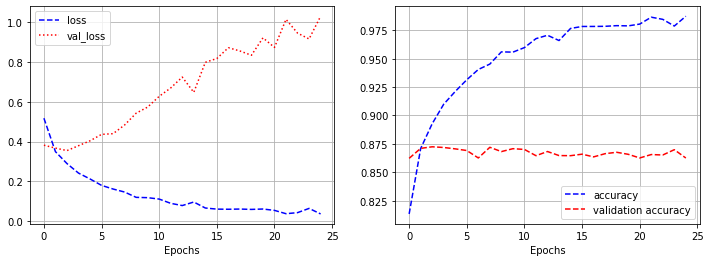

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_1.history['loss'], 'b--', label='loss')
plt.plot(hist_1.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_1.history['acc'], 'b--', label='accuracy')
plt.plot(hist_1.history['val_acc'], 'r--', label='validation accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

### 모델 평가

In [ ]:
model_1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0972 - acc: 0.8555


[1.097185730934143, 0.8554999828338623]

### 모델 재구성
- 학습 파라미터의 수 비교

In [ ]:
def build_model2():
  model = Sequential()

  input = Input(shape=(28, 28, 1))
  output = Conv2D(filters=32, kernel_size=(3, 3))(input)
  output = MaxPool2D(strides=(2, 2))(output)
  output = Conv2D(filters=64, kernel_size=(3, 3))(output)
  output = MaxPool2D(strides=(2, 2))(output)
  output = Conv2D(filters=64, kernel_size=(3, 3))(output)
  output = MaxPool2D(strides=(2, 2))(output)
  output = Flatten()(output)
  output = Dense(units=128, activation='relu')(output)
  output = Dropout(0.3)(output)
  output = Dense(units=64, activation='relu')(output)
  output = Dropout(0.3)(output)
  output = Dense(units=10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  
  return model

model_2 = build_model()
model_2.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3965056   
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

### 모델 재학습

In [ ]:
hist_2 = model_2.fit(x_train, y_train,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25
329/329 [==============================] - 4s 13ms/step - loss: 0.4888 - acc: 0.8240 - val_loss: 0.3932 - val_acc: 0.8601
Epoch 2/25
329/329 [==============================] - 4s 13ms/step - loss: 0.3380 - acc: 0.8764 - val_loss: 0.3725 - val_acc: 0.8676
Epoch 3/25
329/329 [==============================] - 4s 13ms/step - loss: 0.2867 - acc: 0.8941 - val_loss: 0.3724 - val_acc: 0.8719
Epoch 4/25
329/329 [==============================] - 4s 13ms/step - loss: 0.2386 - acc: 0.9095 - val_loss: 0.3856 - val_acc: 0.8679
Epoch 5/25
329/329 [==============================] - 4s 13ms/step - loss: 0.2125 - acc: 0.9203 - val_loss: 0.3928 - val_acc: 0.8745
Epoch 6/25
329/329 [==============================] - 4s 13ms/step - loss: 0.1811 - acc: 0.9314 - val_loss: 0.4150 - val_acc: 0.8694
Epoch 7/25
329/329 [==============================] - 4s 13ms/step - loss: 0.1580 - acc: 0.9422 - val_loss: 0.4818 - val_acc: 0.8676
Epoch 8/25
329/329 [==============================] - 4s 13ms/step - 

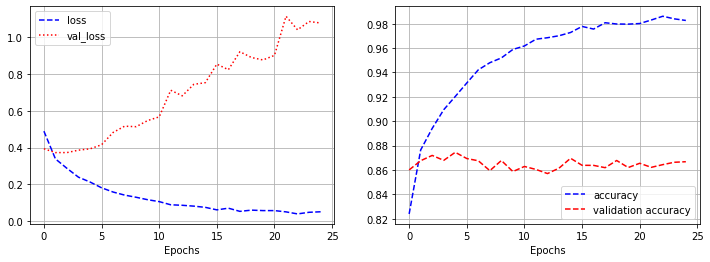

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_2.history['loss'], 'b--', label='loss')
plt.plot(hist_2.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_2.history['acc'], 'b--', label='accuracy')
plt.plot(hist_2.history['val_acc'], 'r--', label='validation accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

### 모델 재평가

In [ ]:
model_2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.1433 - acc: 0.8557


[1.1432875394821167, 0.8557000160217285]

## 모델 성능 높이기 - 많은 레이어 쌓기

In [ ]:
from tensorflow.keras.layers import BatchNormalization, ReLU

In [ ]:
def build_model3():
  model = Sequential()

  input = Input(shape=(28, 28, 1))
  output = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(input)
  output = Conv2D(filters=64, kernel_size=3, activation='relu', padding='valid')(output)
  output = MaxPool2D(strides=(2, 2))(output)
  output = Dropout(0.5)(output)

  output = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(output)
  output = Conv2D(filters=256, kernel_size=3, activation='relu', padding='valid')(output)
  output = MaxPool2D(strides=(2, 2))(output)
  output = Dropout(0.5)(output)

  output = Flatten()(output)
  output = Dense(units=256, activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(units=100, activation='relu')(output)
  output = Dropout(0.3)(output)
  output = Dense(units=10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  
  return model

model_3 = build_model2()
model_3.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)         

## 모델 학습 및 결과 시각화

In [ ]:
hist_3 = model_3.fit(x_train, y_train,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25
329/329 [==============================] - 2s 5ms/step - loss: 0.9027 - acc: 0.6710 - val_loss: 0.5634 - val_acc: 0.7892
Epoch 2/25
329/329 [==============================] - 2s 5ms/step - loss: 0.5809 - acc: 0.7927 - val_loss: 0.4788 - val_acc: 0.8252
Epoch 3/25
329/329 [==============================] - 1s 5ms/step - loss: 0.4992 - acc: 0.8234 - val_loss: 0.4306 - val_acc: 0.8419
Epoch 4/25
329/329 [==============================] - 1s 5ms/step - loss: 0.4513 - acc: 0.8410 - val_loss: 0.4089 - val_acc: 0.8504
Epoch 5/25
329/329 [==============================] - 1s 5ms/step - loss: 0.4081 - acc: 0.8549 - val_loss: 0.3723 - val_acc: 0.8621
Epoch 6/25
329/329 [==============================] - 2s 5ms/step - loss: 0.3832 - acc: 0.8628 - val_loss: 0.3657 - val_acc: 0.8691
Epoch 7/25
329/329 [==============================] - 2s 5ms/step - loss: 0.3579 - acc: 0.8721 - val_loss: 0.3622 - val_acc: 0.8651
Epoch 8/25
329/329 [==============================] - 2s 5ms/step - loss: 0.

- 과적합은 되지 않았지만 층을 늘려도 좋은 성능을 낼 수 있음

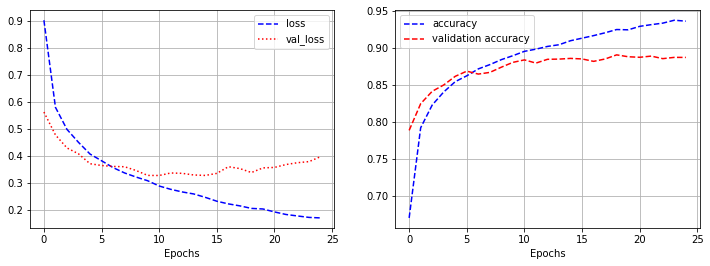

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_3.history['loss'], 'b--', label='loss')
plt.plot(hist_3.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_3.history['acc'], 'b--', label='accuracy')
plt.plot(hist_3.history['val_acc'], 'r--', label='validation accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [ ]:
model_2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.1433 - acc: 0.8557


[1.1432875394821167, 0.8557000160217285]

## 모델 성능 높이기 - 이미지 보강(Image Augmentation)

- 주요 인자 참고: https://keras.io/ko/preprocessing/image/

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.2,
    shear_range=0.6,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

In [ ]:
augment_size = 200

In [ ]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [ ]:
x_augment = image_generator.flow(np.tile(x_train[0].reshape(28*28*1), augment_size).reshape(-1, 28, 28, 1),
                                 np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

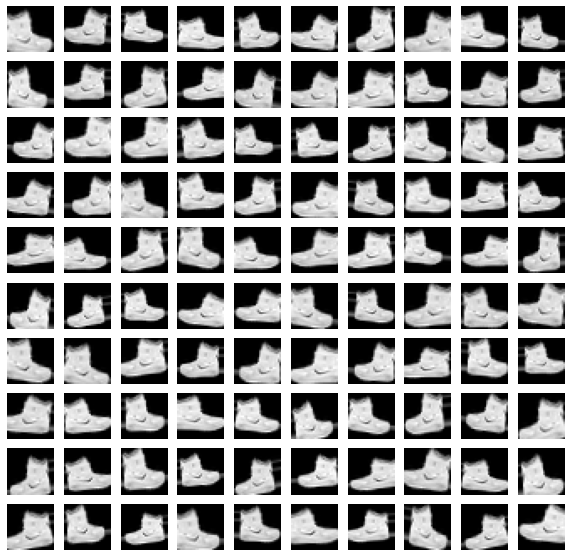

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(1, 101):
  plt.subplot(10, 10, i)
  plt.axis('off')
  plt.imshow(x_augment[i-1].reshape(28, 28), cmap='gray')

데이터 추가

In [ ]:
image_generator = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    shear_range=0.6,
    width_shift_range=0.15,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

In [ ]:
augment_size=30000

In [ ]:
random_mask = np.random.randint(x_train.shape[0], size=augment_size)
x_augmented = x_train[random_mask].copy()
y_augmented = y_train[random_mask].copy()

In [ ]:
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                  batch_size=augment_size, shuffle=False).next()[0]

x_train = np.concatenate((x_train, x_augmented))
y_trian = np.concatenate((y_train, y_augmented))

print(x_train.shape)
print(y_train.shape)

(90000, 28, 28, 1)
(60000,)


## 모델 학습 및 결과 시각화

In [ ]:
model_4 = build_model3()
model_4.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 256)      

#### module import

In [ ]:
hist_4 = model_4.fit(x_train, y_trian,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25
493/493 [==============================] - 9s 18ms/step - loss: 0.7435 - acc: 0.7265 - val_loss: 0.9608 - val_acc: 0.6407
Epoch 2/25
493/493 [==============================] - 8s 17ms/step - loss: 0.4472 - acc: 0.8388 - val_loss: 0.7613 - val_acc: 0.7188
Epoch 3/25
493/493 [==============================] - 8s 17ms/step - loss: 0.3735 - acc: 0.8670 - val_loss: 0.6896 - val_acc: 0.7505
Epoch 4/25
493/493 [==============================] - 9s 17ms/step - loss: 0.3352 - acc: 0.8804 - val_loss: 0.6477 - val_acc: 0.7662
Epoch 5/25
493/493 [==============================] - 9s 17ms/step - loss: 0.3067 - acc: 0.8902 - val_loss: 0.6234 - val_acc: 0.7728
Epoch 6/25
493/493 [==============================] - 8s 17ms/step - loss: 0.2860 - acc: 0.8983 - val_loss: 0.5774 - val_acc: 0.7912
Epoch 7/25
493/493 [==============================] - 8s 17ms/step - loss: 0.2743 - acc: 0.9015 - val_loss: 0.5488 - val_acc: 0.8001
Epoch 8/25
493/493 [==============================] - 8s 17ms/step - 

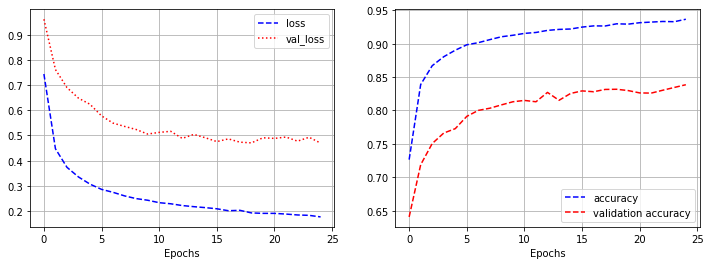

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_4.history['loss'], 'b--', label='loss')
plt.plot(hist_4.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_4.history['acc'], 'b--', label='accuracy')
plt.plot(hist_4.history['val_acc'], 'r--', label='validation accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

- 학습 인자를 이전과 다르게 주면서 학습하면 더 잘 나올것으로 판단

In [ ]:
model_4.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1950 - acc: 0.9352


[0.19496482610702515, 0.9351999759674072]